### Author : Ram Charan Tej

### Task : Prediction using Supervised Machine Learning on Titanic Dataset.

#### Problem Statement : The data will contain the details of a subset of the passengers on board (891 to be exact)and importantly, will reveal whether they survived or not, also known as the “ground truth.Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

#### Model : Since the output or the variable to be predicted is a "Classified Form" (1 or 0) we will build the model using "Logistic regression".

In [320]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading and Understanding the data

In [321]:
titanic_data = pd.read_csv("titanic_train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [322]:
titanic_data.shape

(891, 12)

In [323]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [324]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [325]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Looks like the features "Age" and "Cabin" have high rate of null values. Lets try solving it.

In [326]:
((titanic_data["Age"].isnull().sum())/titanic_data.shape[0]).round(3)

0.199

#### It has around 20% null values lets try imputation techniques.

In [327]:
titanic_data['Age'].mean()

29.69911764705882

#### The mean age of passengers is 30 lets impute it to missing values.

In [328]:
titanic_data["Age"] = titanic_data["Age"].fillna(titanic_data['Age'].mean())

In [329]:
titanic_data["Age"].isnull().sum()

0

In [330]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [331]:
titanic_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [332]:
titanic_data["Embarked"] = titanic_data["Embarked"].fillna("S")

In [333]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [334]:
print(titanic_data["Cabin"].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [335]:
print((titanic_data["Cabin"].isnull().sum())/titanic_data.shape[0])

0.7710437710437711


#### As you can see more number of null values in this column like around 78%. If we want to drop this columns we can drop. But if you think like need any kind of insights from this feature like "People in which cabin have high rate of survival" we need to keep this column. In order to deal it with we will replace null values with "Unknown".

In [336]:
titanic_data["Cabin"] = titanic_data["Cabin"].fillna("Unknown")

In [337]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [338]:
titanic_data["Cabin"].value_counts()

Unknown        687
B96 B98          4
C23 C25 C27      4
G6               4
E101             3
              ... 
C32              1
C99              1
D7               1
C148             1
F G63            1
Name: Cabin, Length: 148, dtype: int64

### Data Cleaning.

#### Lets have alook at categorical variables. We have two columns like "Sibsp" and "Parch" which describes the family status. As we are specifically interested in rate of survival rather than rate over family we will combine both the columns into family and make a new column.


In [339]:
titanic_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [340]:
titanic_data["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [341]:
titanic_data["Family"] = titanic_data["SibSp"] + titanic_data["Parch"]


In [342]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0


In [343]:
titanic_data = titanic_data.drop(["SibSp", "Parch"], axis=1)

In [344]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,Unknown,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,Unknown,S,0


#### Lets remove the columns which we like like not nessasary for modelling.

In [345]:
titanic_data = titanic_data.drop(["Name", "Ticket"], axis=1)

In [346]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,1,0,3,male,22.0,7.2500,Unknown,S,1
1,2,1,1,female,38.0,71.2833,C85,C,1
2,3,1,3,female,26.0,7.9250,Unknown,S,0
3,4,1,1,female,35.0,53.1000,C123,S,1
4,5,0,3,male,35.0,8.0500,Unknown,S,0


In [347]:
titanic_data["Cabin"].unique()

array(['Unknown', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

#### If you see in the above values we can find many unique values. So while creating dummies we will be having so many features which creates a complicated model so lets sort this column.

In [348]:
titanic_data["Cabin"] = titanic_data["Cabin"].apply(lambda x : "Unknown" if x == "Unknown" else x[0])

In [349]:
titanic_data["Cabin"].unique()

array(['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

#### We have made the cabin into 9 columns.

#### Now the data is ready for modelling. Lest check for insights.

### Exploratory Data Analysis.

#### Univariant analysis

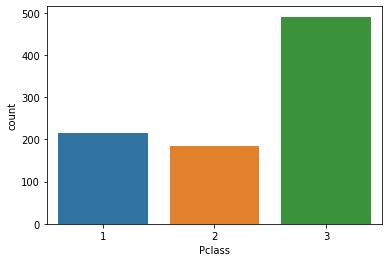

In [350]:
sns.countplot(x = titanic_data.Pclass)
plt.show()

#### Most of the passengers are from Class "3".

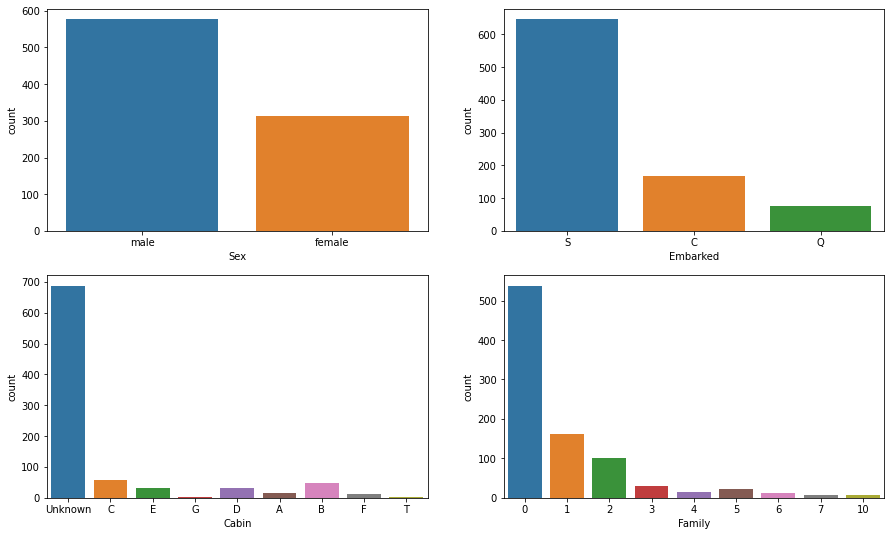

In [351]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.countplot(x=titanic_data.Sex)
plt.subplot(2,2,2)
sns.countplot(x=titanic_data.Embarked)
plt.subplot(2,2,3)
sns.countplot(x=titanic_data.Cabin)
plt.subplot(2,2,4)
sns.countplot(x=titanic_data.Family)
plt.show()

### Insights:
#### Most of the passengers are male in th ship
#### Most of the Embarkation of port is from port "Southampton".
#### Coming to the cabins Most of the cabins are uknown apart from that most are in "C" and "B".
#### Most of the passengers members are travelling alone without any family members.

#### for age lets create bins for it to categorize the age.

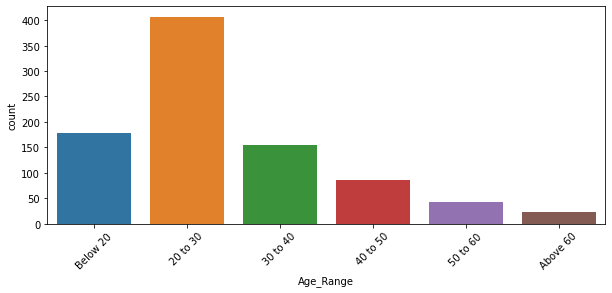

In [352]:
values = [0,20,30,40,50,60,80]
ranges = ["Below 20", "20 to 30", "30 to 40", "40 to 50", "50 to 60", "Above 60"]
titanic_data["Age_Range"] = pd.cut(titanic_data["Age"], values, labels=ranges)
plt.figure(figsize=[10,4])
sns.countplot(x='Age_Range', data=titanic_data)
plt.xticks(rotation=45)
plt.show()

#### Most of the passengers are at age between 20 to 30. And least are above 60 as we can predict that.

#### Bivariant Analysis.


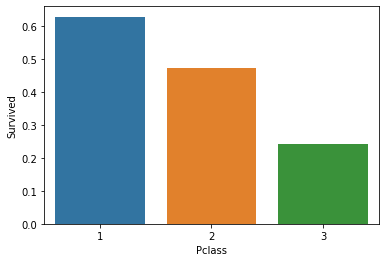

In [353]:
sns.barplot(x = titanic_data.Pclass, y = titanic_data.Survived, ci=None)
plt.show()

#### Class on passenger have high rate of survival.

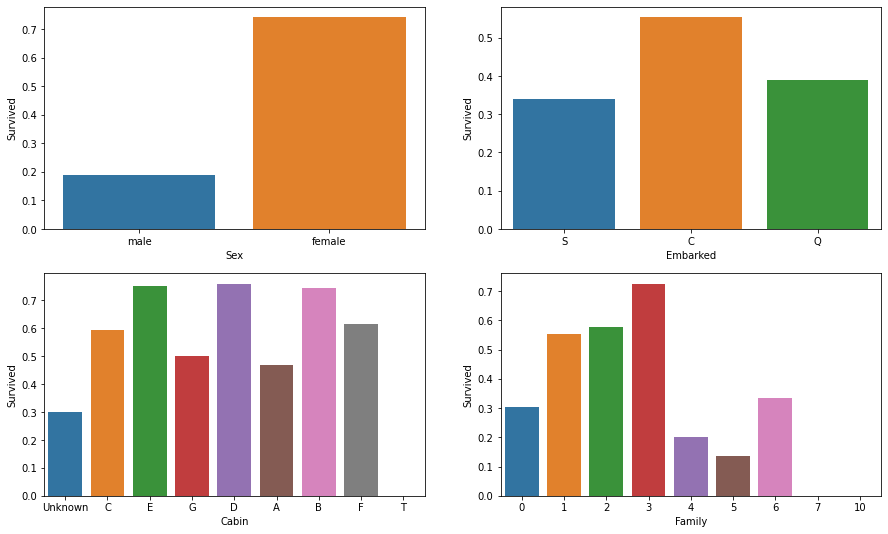

In [354]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.barplot(x=titanic_data.Sex, y = titanic_data.Survived, ci=None)
plt.subplot(2,2,2)
sns.barplot(x=titanic_data.Embarked, y = titanic_data.Survived, ci=None)
plt.subplot(2,2,3)
sns.barplot(x=titanic_data.Cabin, y = titanic_data.Survived, ci=None)
plt.subplot(2,2,4)
sns.barplot(x=titanic_data.Family, y = titanic_data.Survived, ci=None)
plt.show()

### Insights:
#### Surprizingly Female passengers have high rate of survival than male.
#### Passengers embarked from port "Cherbourg" have high rate of Survival.
#### Passengers in cabin series "B" , "D", "E", have significant rate of survival.
#### Family status with 3 have high rate of survival.

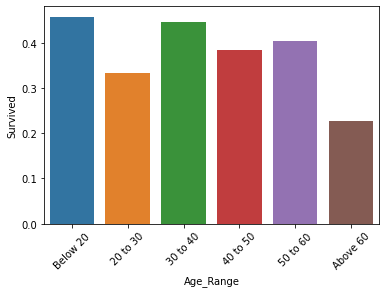

In [355]:
sns.barplot(x='Age_Range',y = "Survived", data=titanic_data, ci=None)
plt.xticks(rotation=45)
plt.show()

#### Passengers with age below "20' and between "30 to 40" have high survival rate.

#### Multi variant Analysis

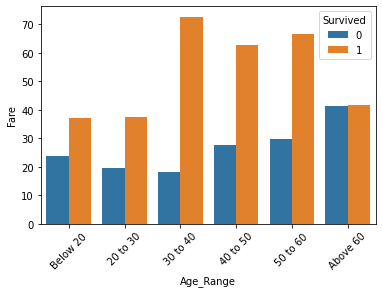

In [356]:
sns.barplot(x='Age_Range',y = "Fare",hue = "Survived", data=titanic_data, ci=None)
plt.xticks(rotation=45)
plt.show()

#### Outliers

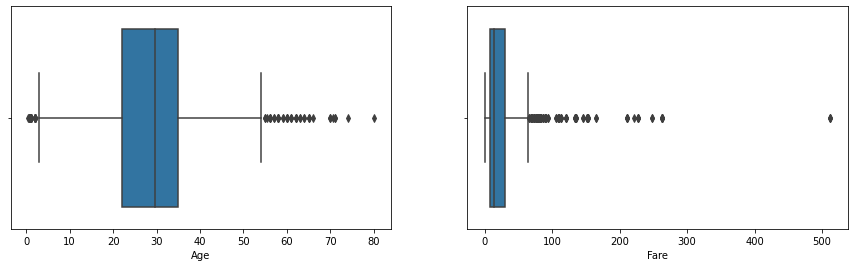

In [357]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
sns.boxplot(x=titanic_data.Age)
plt.subplot(2,2,2)
sns.boxplot(x=titanic_data.Fare)
plt.show()

#### As we can see there is one outlier in "Fare" which we need to check

In [358]:
titanic_data.Fare.describe(percentiles = [.25, .5, .75,  .90, .99])

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
90%       77.958300
99%      249.006220
max      512.329200
Name: Fare, dtype: float64

#### As we can see 99% of values are at 219 only one value reaches 500 which surely tells us as outlier so lets drop it.

In [359]:
out_col = titanic_data[ titanic_data['Fare'] == 512.329200 ].index
titanic_data.drop(out_col, inplace = True)

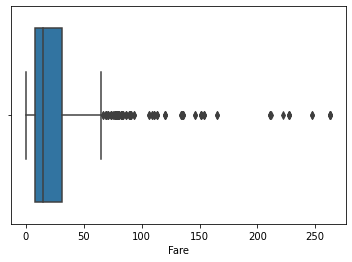

In [360]:
sns.boxplot(x=titanic_data.Fare)
plt.show()

In [361]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Age_Range
0,1,0,3,male,22.0,7.2500,Unknown,S,1,20 to 30
1,2,1,1,female,38.0,71.2833,C,C,1,30 to 40
2,3,1,3,female,26.0,7.9250,Unknown,S,0,20 to 30
3,4,1,1,female,35.0,53.1000,C,S,1,30 to 40
4,5,0,3,male,35.0,8.0500,Unknown,S,0,30 to 40


#### Lets find the correlations between the features.

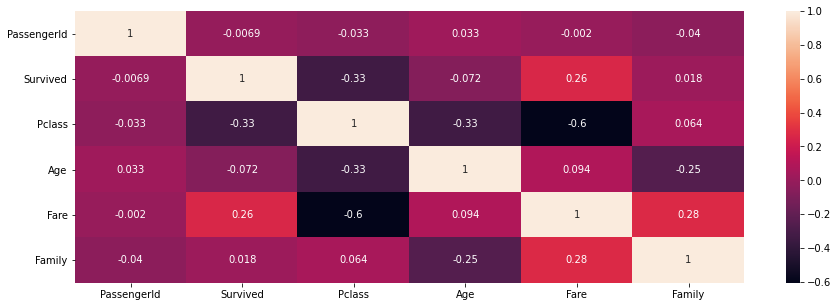

In [362]:
plt.figure(figsize=(15,5))
sns.heatmap(titanic_data.corr(),annot = True)
plt.show()

#### As we can see all columns have significant rate of correlation factors between them except for "Age" and "Fare". Since they are important factors to predict the survival. we will keep them.

#### Passengers with age between "30 to 40" and high fare rate have high rate of survival compare to remaining ages.

### Data Preparation

#### Lets check for Survival rate in train set. 

In [363]:
survived = sum(titanic_data.Survived)
Total = len(titanic_data.Survived)
survival_rate = (survived/Total)*100
survival_rate

38.17567567567568

#### There is around 39 percentage of survival rate.

In [364]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Age_Range
0,1,0,3,male,22.0,7.2500,Unknown,S,1,20 to 30
1,2,1,1,female,38.0,71.2833,C,C,1,30 to 40
2,3,1,3,female,26.0,7.9250,Unknown,S,0,20 to 30
3,4,1,1,female,35.0,53.1000,C,S,1,30 to 40
4,5,0,3,male,35.0,8.0500,Unknown,S,0,30 to 40


In [365]:
titanic_data = titanic_data.drop(["Age_Range"],axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,1,0,3,male,22.0,7.2500,Unknown,S,1
1,2,1,1,female,38.0,71.2833,C,C,1
2,3,1,3,female,26.0,7.9250,Unknown,S,0
3,4,1,1,female,35.0,53.1000,C,S,1
4,5,0,3,male,35.0,8.0500,Unknown,S,0


In [366]:
titanic_data["Sex"] = titanic_data["Sex"].apply(lambda x : "1" if x == "male" else "0")

In [367]:
titanic_data["Sex"] = titanic_data.Sex.astype("int")

In [368]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,1,0,3,1,22.0,7.2500,Unknown,S,1
1,2,1,1,0,38.0,71.2833,C,C,1
2,3,1,3,0,26.0,7.9250,Unknown,S,0
3,4,1,1,0,35.0,53.1000,C,S,1
4,5,0,3,1,35.0,8.0500,Unknown,S,0


#### Creating dummies

In [369]:
dum_data = pd.get_dummies(titanic_data[["Cabin", "Embarked"]], drop_first = True)

In [370]:
final_data = pd.concat([titanic_data, dum_data], axis=1)
final_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,7.2500,Unknown,S,1,0,0,0,0,0,0,0,1,0,1
1,2,1,1,0,38.0,71.2833,C,C,1,0,1,0,0,0,0,0,0,0,0
2,3,1,3,0,26.0,7.9250,Unknown,S,0,0,0,0,0,0,0,0,1,0,1
3,4,1,1,0,35.0,53.1000,C,S,1,0,1,0,0,0,0,0,0,0,1
4,5,0,3,1,35.0,8.0500,Unknown,S,0,0,0,0,0,0,0,0,1,0,1


In [371]:
final_data.shape

(888, 19)

In [372]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    888 non-null    int64  
 1   Survived       888 non-null    int64  
 2   Pclass         888 non-null    int64  
 3   Sex            888 non-null    int32  
 4   Age            888 non-null    float64
 5   Fare           888 non-null    float64
 6   Cabin          888 non-null    object 
 7   Embarked       888 non-null    object 
 8   Family         888 non-null    int64  
 9   Cabin_B        888 non-null    uint8  
 10  Cabin_C        888 non-null    uint8  
 11  Cabin_D        888 non-null    uint8  
 12  Cabin_E        888 non-null    uint8  
 13  Cabin_F        888 non-null    uint8  
 14  Cabin_G        888 non-null    uint8  
 15  Cabin_T        888 non-null    uint8  
 16  Cabin_Unknown  888 non-null    uint8  
 17  Embarked_Q     888 non-null    uint8  
 18  Embarked_S

In [373]:
final_data = final_data.drop(["Pclass", "Cabin", "Embarked"], axis=1)

In [374]:
final_data.head()

,PassengerId,Survived,Sex,Age,Fare,Family,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S
0,1,0,1,22.0,7.2500,1,0,0,0,0,0,0,0,1,0,1
1,2,1,0,38.0,71.2833,1,0,1,0,0,0,0,0,0,0,0
2,3,1,0,26.0,7.9250,0,0,0,0,0,0,0,0,1,0,1
3,4,1,0,35.0,53.1000,1,0,1,0,0,0,0,0,0,0,1
4,5,0,1,35.0,8.0500,0,0,0,0,0,0,0,0,1,0,1


In [375]:
X = final_data.drop(["PassengerId", "Survived"], axis=1)

In [376]:
y = final_data["Survived"]

In [377]:
print(X.head())
print(y.head())

   Sex   Age     Fare  Family  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  \
0    1  22.0   7.2500       1        0        0        0        0        0   
1    0  38.0  71.2833       1        0        1        0        0        0   
2    0  26.0   7.9250       0        0        0        0        0        0   
3    0  35.0  53.1000       1        0        1        0        0        0   
4    1  35.0   8.0500       0        0        0        0        0        0   

   Cabin_G  Cabin_T  Cabin_Unknown  Embarked_Q  Embarked_S  
0        0        0              1           0           1  
1        0        0              0           0           0  
2        0        0              1           0           1  
3        0        0              0           0           1  
4        0        0              1           0           1  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


#### Scaling data

In [378]:
from sklearn.preprocessing import StandardScaler

In [379]:
scaler = StandardScaler()
X[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])
X.head()

,Sex,Age,Fare,Family,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S
0,1,-0.590209,-0.566959,1,0,0,0,0,0,0,0,1,0,1
1,0,0.639380,0.989016,1,0,1,0,0,0,0,0,0,0,0
2,0,-0.282812,-0.550557,0,0,0,0,0,0,0,0,1,0,1
3,0,0.408832,0.547171,1,0,1,0,0,0,0,0,0,0,1
4,1,0.408832,-0.547519,0,0,0,0,0,0,0,0,1,0,1


#### In order to select optimal number of features we will do RFE (Recursive Feature Elimination)

### RFE

In [380]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 8)
rfe = rfe.fit(X, y)

In [381]:
rfe.support_

array([ True,  True, False, False, False, False,  True,  True, False,
        True, False,  True,  True,  True])

In [382]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Sex', True, 1),
 ('Age', True, 1),
 ('Fare', False, 3),
 ('Family', False, 4),
 ('Cabin_B', False, 6),
 ('Cabin_C', False, 2),
 ('Cabin_D', True, 1),
 ('Cabin_E', True, 1),
 ('Cabin_F', False, 7),
 ('Cabin_G', True, 1),
 ('Cabin_T', False, 5),
 ('Cabin_Unknown', True, 1),
 ('Embarked_Q', True, 1),
 ('Embarked_S', True, 1)]

#### Feature selected

In [383]:
feature_final = X.columns[rfe.support_]
feature_final

Index(['Sex', 'Age', 'Cabin_D', 'Cabin_E', 'Cabin_G', 'Cabin_Unknown',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

#### Features Eliminated with RFE.

In [384]:
X.columns[~rfe.support_]

Index(['Fare', 'Family', 'Cabin_B', 'Cabin_C', 'Cabin_F', 'Cabin_T'], dtype='object')

### Model Building

In [385]:
import statsmodels.api as sm
X_sm = sm.add_constant(X[feature_final])
logm2 = sm.GLM(y.astype(float), X_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  888
Model:                            GLM   Df Residuals:                      879
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -406.90
Date:                Mon, 31 May 2021   Deviance:                       813.80
Time:                        12:34:50   Pearson chi2:                     876.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7349      0.307      8.916      0.000       2.134       3.336
Sex              -2.5980      0.185    -14.044      0.000      -2.961      -2.235
Age              -0.3325      0.094     -3.544      0.000      -0.516      -0.149
Cabin_D           0.6542      0.514      1.272      0.203      -0.353       1.662
Cabin_E           1.0159      0.519      1.957      0.050      -0.002       2.033
Cabin_G          -2.4985      1.057     -2.364      0.018      -4.570      -0.427
Cabin_Unknown    -1.5914      0.252     -6.307      0.000      -2.086      -1.097
Embarked_Q       -0.5185      0.358     -1.450      0.147      -1.220       0.183
Embarked_S       -0.6180      0.231     -2.679      0.007      -1.070      -0.166
=================================================================================
"""

#### We can see p values of few columns significant.

In [386]:
feature_final = feature_final.drop(["Cabin_E", "Cabin_D", "Embarked_Q"])

In [387]:
X_sm = sm.add_constant(X[feature_final])
logm2 = sm.GLM(y.astype(float),X_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  888
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -410.27
Date:                Mon, 31 May 2021   Deviance:                       820.53
Time:                        12:34:50   Pearson chi2:                     878.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8057      0.268     10.480      0.000       2.281       3.330
Sex              -2.5710      0.183    -14.065      0.000      -2.929      -2.213
Age              -0.3175      0.092     -3.437      0.001      -0.498      -0.136
Cabin_G          -2.7688      1.050     -2.636      0.008      -4.827      -0.710
Cabin_Unknown    -1.8928      0.221     -8.546      0.000      -2.327      -1.459
Embarked_S       -0.4012      0.194     -2.070      0.038      -0.781      -0.021
=================================================================================
"""

#### We can see the values of p are significant.

#### Now lets check the variance of the model to check accuracy.  using VIF.

In [388]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X[feature_final].columns
vif['VIF'] = [variance_inflation_factor(X[feature_final].values, i) for i in range(X[feature_final].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Cabin_Unknown,3.24
4,Embarked_S,2.89
0,Sex,2.66
1,Age,1.07
2,Cabin_G,1.03


#### The VIF values of the columns looks Significant. Now lets predict the survival values(y_pred).


In [389]:
y_pred = res.predict(X_sm)
y_pred[:10]

0    0.133317
1    0.931035
2    0.645994
3    0.906759
4    0.100733
5    0.159954
6    0.318676
7    0.200367
8    0.640395
9    0.785067
dtype: float64

#### The above values are the predicted values of probabilty for a passenger to survive. Lets make it a Dataframe.

In [390]:
y_pred = y_pred.values.reshape(-1)
y_pred[:10]

array([0.13331727, 0.93103512, 0.64599435, 0.90675875, 0.10073347,
       0.1599538 , 0.31867612, 0.20036696, 0.64039546, 0.78506745])

In [391]:
y_pred_final = pd.DataFrame({"Survived" : y.values, "Survival_probability" : y_pred})
y_pred_final["Passenger_Number"] = y.index
y_pred_final.head()

,Survived,Survival_probability,Passenger_Number
0,0,0.133317,0
1,1,0.931035,1
2,1,0.645994,2
3,1,0.906759,3
4,0,0.100733,4


#### In order to find the Predicted values lets consider a manual cutoff to the Probability. Lets consider 0.5.

In [392]:
y_pred_final["Predicted"] = y_pred_final["Survival_probability"].map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Survived,Survival_probability,Passenger_Number,Predicted
0,0,0.133317,0,0
1,1,0.931035,1,1
2,1,0.645994,2,1
3,1,0.906759,3,1
4,0,0.100733,4,0


#### In order to check the performance of the model we have evaluation metrics.

### Model Evaluation.

In [393]:
from sklearn import metrics

In [394]:
print(metrics.accuracy_score(y_pred_final.Survived, y_pred_final.Predicted))

0.7871621621621622


#### For training dataset we have around 79% Accuracy we have other evaluation metrics also.

#### In order to evaluate the model we ned to create "Confusion Matrix".

In [395]:
confusion_matrix = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.Predicted)
confusion_matrix

array([[456,  93],
       [ 96, 243]], dtype=int64)

#### Actual/Predicted           Not-Survived         Survived
        # Not-Survived        456      93
        # Survived            95       247  

In [396]:
True_positives = confusion_matrix[1,1]  
True_negatives = confusion_matrix[0,0] 
False_postives = confusion_matrix[0,1] 
False_negatives = confusion_matrix[1,0]

#### We have evaluation mtrics like "Sensitivity", "Specificity" which describe the proportion of positive and negative rate of model.


#### Sensitivity

In [397]:
True_positives/(True_positives+False_negatives)

0.7168141592920354

#### Specificity

In [398]:
True_negatives/(True_negatives+False_postives)

0.8306010928961749

#### Positive predictive value

In [399]:
True_positives/(True_positives + False_postives)

0.7232142857142857

#### False Predictive value

In [400]:
True_negatives/(True_negatives + False_negatives)

0.8260869565217391

#### Lets check the Variability of positive and negative predictive values using ROC curve

#### ROC

In [401]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

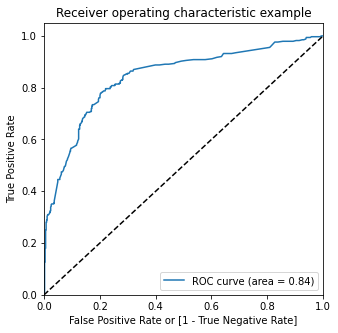

In [402]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Survived, y_pred_final.Survival_probability, drop_intermediate = False )
draw_roc(y_pred_final.Survived, y_pred_final.Survival_probability)

#### The area under the curve is around 0.84 which good. 

#### Lets find the optimal cutoff of probability for our model.

In [403]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Survival_probability.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,Survived,Survival_probability,Passenger_Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.133317,0,0,1,1,0,0,0,0,0,0,0,0
1,1,0.931035,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.645994,2,1,1,1,1,1,1,1,1,0,0,0
3,1,0.906759,3,1,1,1,1,1,1,1,1,1,1,1
4,0,0.100733,4,0,1,1,0,0,0,0,0,0,0,0


In [404]:
cutoff_df = pd.DataFrame( columns = ['Probabilty','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     Probabilty  Accuracy  Sensitivity  Specificity
0.0         0.0  0.381757     1.000000     0.000000
0.1         0.1  0.456081     0.979351     0.132969
0.2         0.2  0.761261     0.828909     0.719490
0.3         0.3  0.772523     0.808260     0.750455
0.4         0.4  0.787162     0.784661     0.788707
0.5         0.5  0.787162     0.716814     0.830601
0.6         0.6  0.781532     0.628319     0.876138
0.7         0.7  0.754505     0.445428     0.945355
0.8         0.8  0.719595     0.280236     0.990893
0.9         0.9  0.695946     0.212389     0.994536


#### Evaluation Metric plot

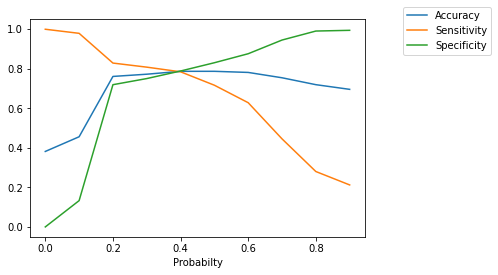

In [405]:
cutoff_df.plot.line(x='Probabilty', y=['Accuracy','Sensitivity','Specificity'])
plt.legend(bbox_to_anchor=(1.1, 1.08))
plt.show()

#### From the above plot we can see that the three evaluation metrics have cut-off as 0.4.

In [406]:
y_pred_final['Final_Predicted'] = y_pred_final.Survival_probability.map( lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Survived,Survival_probability,Passenger_Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.133317,0,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.931035,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.645994,2,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.906759,3,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.100733,4,0,1,1,0,0,0,0,0,0,0,0,0


#### Evaluation

#### Accuracy

In [407]:
print(metrics.accuracy_score(y_pred_final.Survived, y_pred_final.Final_Predicted))

0.7871621621621622


In [408]:
confusion_matrix1 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.Final_Predicted)
confusion_matrix1

array([[433, 116],
       [ 73, 266]], dtype=int64)

In [409]:
True_positives = confusion_matrix1[1,1]  
True_negatives = confusion_matrix1[0,0] 
False_postives = confusion_matrix1[0,1] 
False_negatives = confusion_matrix1[1,0]

#### Sensitivity

In [410]:
True_positives/(True_positives + False_negatives)

0.7846607669616519

#### Specificity

In [411]:
True_negatives/(True_negatives + False_postives)

0.7887067395264117

#### False Predictive rate

In [412]:
False_postives/(False_postives + True_negatives)

0.21129326047358835

#### Positive Predictive rate

In [413]:
True_positives/(True_positives + False_postives)

0.6963350785340314

#### Lets check for precision and recall for initial cutoff prediction values.

In [414]:
confusion_pr = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.Predicted)
confusion_pr

array([[456,  93],
       [ 96, 243]], dtype=int64)

In [415]:
True_positives = confusion_pr[1,1]  
True_negatives = confusion_pr[0,0] 
False_postives = confusion_pr[0,1] 
False_negatives = confusion_pr[1,0]

#### Precision

In [416]:
True_positives/(True_positives + False_postives)

0.7232142857142857

#### Recall

In [417]:
True_positives/(True_positives + False_negatives)

0.7168141592920354

#### Lets plot Precision Recall curve.

In [418]:
from sklearn.metrics import precision_recall_curve

In [419]:
y_pred_final.Survived, y_pred_final.Predicted

(0      0
 1      1
 2      1
 3      1
 4      0
       ..
 883    0
 884    1
 885    0
 886    1
 887    0
 Name: Survived, Length: 888, dtype: int64,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 883    0
 884    1
 885    1
 886    1
 887    0
 Name: Predicted, Length: 888, dtype: int64)

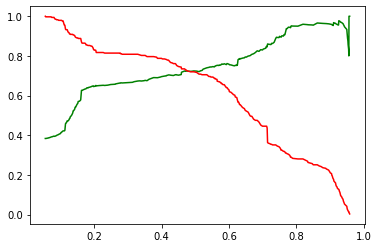

In [420]:
p, r, thresholds = precision_recall_curve(y_pred_final.Survived, y_pred_final.Survival_probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From the above PR plot we can see the cutoff value as 0.5.

### Test Data Set

In [421]:
titanic_test_data = pd.read_csv("titanic_test.csv")
titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [422]:
titanic_test_data.shape

(418, 11)

In [423]:
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [424]:
titanic_test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [425]:
titanic_test_data["Age"] = titanic_test_data["Age"].fillna(titanic_test_data['Age'].mean())

In [426]:
titanic_test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [427]:
titanic_test_data["Cabin"] = titanic_test_data["Cabin"].fillna("Unknown")

In [428]:
titanic_test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [429]:
titanic_test_data["Fare"] = titanic_test_data["Fare"].fillna(titanic_test_data['Fare'].mean())

In [430]:
titanic_test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [431]:
titanic_test_data["Family"] = titanic_test_data["SibSp"] + titanic_test_data["Parch"]

In [432]:
titanic_test_data = titanic_test_data.drop(["SibSp", "Parch"], axis=1)

In [433]:
titanic_test_data = titanic_test_data.drop(["Name", "Ticket"], axis=1)

In [434]:
titanic_test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,892,3,male,34.5,7.8292,Unknown,Q,0
1,893,3,female,47.0,7.0000,Unknown,S,1
2,894,2,male,62.0,9.6875,Unknown,Q,0
3,895,3,male,27.0,8.6625,Unknown,S,0
4,896,3,female,22.0,12.2875,Unknown,S,2


In [435]:
titanic_test_data["Cabin"] = titanic_test_data["Cabin"].apply(lambda x : "Unknown" if x == "Unknown" else x[0])

In [436]:
titanic_test_data.Cabin.unique()


array(['Unknown', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

### Data preparation on Test data.

In [437]:
dum_test_data = pd.get_dummies(titanic_test_data[["Pclass", "Cabin", "Embarked"]], drop_first = True)


In [438]:
final_test_data = pd.concat([titanic_test_data, dum_test_data], axis=1)
final_test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Pclass,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Unknown,Embarked_Q,Embarked_S
0,892,3,male,34.5,7.8292,Unknown,Q,0,3,0,0,0,0,0,0,1,1,0
1,893,3,female,47.0,7.0000,Unknown,S,1,3,0,0,0,0,0,0,1,0,1
2,894,2,male,62.0,9.6875,Unknown,Q,0,2,0,0,0,0,0,0,1,1,0
3,895,3,male,27.0,8.6625,Unknown,S,0,3,0,0,0,0,0,0,1,0,1
4,896,3,female,22.0,12.2875,Unknown,S,2,3,0,0,0,0,0,0,1,0,1


In [439]:
final_test_data = final_test_data.drop(["Pclass", "Cabin", "Embarked"], axis=1)

In [440]:
final_test_data.head()

,PassengerId,Sex,Age,Fare,Family,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Unknown,Embarked_Q,Embarked_S
0,892,male,34.5,7.8292,0,0,0,0,0,0,0,1,1,0
1,893,female,47.0,7.0000,1,0,0,0,0,0,0,1,0,1
2,894,male,62.0,9.6875,0,0,0,0,0,0,0,1,1,0
3,895,male,27.0,8.6625,0,0,0,0,0,0,0,1,0,1
4,896,female,22.0,12.2875,2,0,0,0,0,0,0,1,0,1


In [441]:
final_test_data["Sex"] = final_test_data["Sex"].apply(lambda x : "1" if x == "male" else "0")

In [442]:
final_test_data["Sex"] = final_test_data.Sex.astype("int")

In [443]:
final_test_data.shape

(418, 14)

In [444]:
X_test = final_test_data.drop(["PassengerId"], axis=1)

In [445]:
X_test[["Age", "Fare"]] = scaler.transform(X_test[["Age", "Fare"]])
X_test.head()

,Sex,Age,Fare,Family,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Unknown,Embarked_Q,Embarked_S
0,1,0.370407,-0.552885,0,0,0,0,0,0,0,1,1,0
1,0,1.331023,-0.573034,1,0,0,0,0,0,0,1,0,1
2,1,2.483762,-0.507729,0,0,0,0,0,0,0,1,1,0
3,1,-0.205962,-0.532636,0,0,0,0,0,0,0,1,0,1
4,0,-0.590209,-0.444550,2,0,0,0,0,0,0,1,0,1


In [446]:
X_test = X_test[feature_final]
X_test.head()

,Sex,Age,Cabin_G,Cabin_Unknown,Embarked_S
0,1,0.370407,0,1,0
1,0,1.331023,0,1,1
2,1,2.483762,0,1,0
3,1,-0.205962,0,1,1
4,0,-0.590209,0,1,1


In [447]:
X_test_sm = sm.add_constant(X_test)

In [448]:
y_test_pred = res.predict(X_test_sm)

In [449]:
y_test_pred[:10]

0    0.144835
1    0.522271
2    0.079686
3    0.119842
4    0.667981
5    0.157524
6    0.711995
7    0.122439
8    0.768143
9    0.136161
dtype: float64

In [450]:
y_pred_test = pd.DataFrame(y_test_pred)
y_pred_test.head()

,0
0,0.144835
1,0.522271
2,0.079686
3,0.119842
4,0.667981


In [451]:
y_test = pd.DataFrame()
y_test["Passenger_Id"] = y_test.index

In [452]:
y_pred_test_final = pd.concat([y_test, y_pred_test], axis=1)

In [453]:
y_pred_test_final.head()

,Passenger_Id,0
0,NaN,0.144835
1,NaN,0.522271
2,NaN,0.079686
3,NaN,0.119842
4,NaN,0.667981


In [454]:
y_pred_test_final = y_pred_test_final.rename(columns={0 : "Survival_probability"})
y_pred_test_final.head()

,Passenger_Id,Survival_probability
0,NaN,0.144835
1,NaN,0.522271
2,NaN,0.079686
3,NaN,0.119842
4,NaN,0.667981


In [455]:
y_pred_test_final["Final_predicted"] = y_pred_test_final.Survival_probability.map(lambda x : 1 if x > 0.5 else 0)

In [456]:
y_pred_test_final

,Passenger_Id,Survival_probability,Final_predicted
0,NaN,0.144835,0
1,NaN,0.522271,1
2,NaN,0.079686,0
3,NaN,0.119842,0
4,NaN,0.667981,1
...,...,...,...
413,NaN,0.111673,0
414,NaN,0.929452,1
415,NaN,0.093258,0
416,NaN,0.111673,0


In [457]:
Survival_Score=pd.DataFrame({'Survival_probability':y_pred_test_final['Survival_probability'].values})
Survival_Score['Survival_Score'] = Survival_Score['Survival_probability']*100
Survival_Score['Survived'] = y_pred_test_final.Survival_probability.map(lambda x : 1 if x > 0.5 else 0)
Survival_Score

,Survival_probability,Survival_Score,Survived
0,0.144835,14.483507,0
1,0.522271,52.227080,1
2,0.079686,7.968647,0
3,0.119842,11.984214,0
4,0.667981,66.798058,1
...,...,...,...
413,0.111673,11.167279,0
414,0.929452,92.945205,1
415,0.093258,9.325778,0
416,0.111673,11.167279,0


#### The above score are the scores predicted by the model on the test set .


#### Survival Rate or "ground Truth" in test data.

In [458]:
(((Survival_Score["Survived"].sum())/Survival_Score.shape[0])*100).round(2)

39.95

#### Around 40% of the passengers from test data have survived.

### Model Predictions
#### PClass:
        Class "1" people survived most compared to other classes.
#### Gender:
        Females have high rate of survival.
#### Embarked:
        Port of Embarkation at "Cherbourg" survived mostly.
#### Cabin:
        people in cabins "E", "D", "B" Survived mostly.